In [93]:
calname = 'cal15'
strt = '2003-10-01'
nd = '2012-09-30'
n = 300

obs = pd.read_pickle('./data/como_q_obs.pcl')[strt:nd]

def split_filename(fl):
    return int(fl.split('/')[-1].split('_')[-1].split('.')[0])

def compute_metric(df):
    return df.nse_norm*df.nse_log_norm*(1.-df.pe_norm)

import glob

In [126]:
# grab the calibration output files and parse out the index number
tmp = glob.glob('/RHESSys/Como/out/cal/%s_*.npz'%(calname))
files = pd.DataFrame({'filename':tmp})
files['idx'] = files.filename.map(split_filename)
files.index = files.idx
files.sort_index(inplace=True)

In [127]:
len(files)

293

In [128]:
# make a dataframe of the calibration parameters
tmp = glob.glob('/RHESSys/Como/scripts/%s_*.txt'%(calname))
names = []
for fl in tmp:
    names.append(fl.split('/')[-1].split('_')[-1].split('.')[0])

params = pd.DataFrame(columns=names)

for name,fl in zip(names,tmp):
    params[name] = np.loadtxt(fl)
    
params['idx'] = np.arange(0,n)
params.index = params.idx
params['idx'] = params.index

In [129]:
params.head(15)

,alpsnowscale,forsnowscale,gw1,gw2,plapse,idx
idx,,,,,,
0,0.20154,0.95845,0.36070,0.00545,0.00009,0
1,0.08951,0.52046,0.01028,0.14922,0.00050,1
2,0.03836,0.77431,0.16558,0.03995,0.00034,2
3,0.05162,0.70172,0.06645,0.48191,0.00026,3
4,0.04106,0.88613,0.26587,0.04247,0.00012,4
5,0.22479,0.68214,0.32066,0.27703,0.00008,5
6,0.22111,0.56407,0.11286,0.13275,0.00041,6
7,0.12847,0.78992,0.10775,0.11890,0.00027,7
8,0.24252,0.97989,0.24285,0.49790,0.00006,8


In [130]:
data = pd.read_csv('/RHESSys/Como/out/%s.txt'%(calname),names=['idx','pe','nse','nse_log','rmse'],index_col='idx')

In [131]:
if calname == 'cal01':
    data = data[-66:] # this is because the first few records are old in the cal01 file...

In [132]:
data.sort_index(inplace=True)

In [133]:
data.pe = data.pe.abs() # take the absolute value of the percent error before normalizing

In [134]:
data2 = data.copy()

In [135]:
data2['idx'] = data2.index

In [136]:
data.sort_values(by='nse',ascending=False,inplace=True)

In [137]:
out = data.head(10).copy()
out['idx'] = out.index

In [138]:
out

,pe,nse,nse_log,rmse,idx
idx,,,,,
44,0.010032,-2.148095,-1.852951,35.939283,44
136,0.061139,-2.265609,-2.628469,36.603921,136
93,0.041107,-2.329913,-1.802184,36.962552,93
152,0.056750,-2.424721,-2.689167,37.485052,152
276,0.074903,-2.608648,-3.086814,38.478465,276
245,0.029161,-2.818449,-2.279764,39.581203,245
14,0.157345,-3.016930,-2.160423,40.596878,14
227,0.079285,-3.466163,-4.293796,42.806802,227
113,0.089327,-3.483566,-4.339094,42.890123,113


In [139]:
out = pd.merge(left=out,right=params,how='inner',on='idx')

In [140]:
data2 = pd.merge(left=data2,right=params,how='inner', on='idx')

In [141]:
out.head(5)

,pe,nse,nse_log,rmse,idx,alpsnowscale,forsnowscale,gw1,gw2,plapse
0,0.010032,-2.148095,-1.852951,35.939283,44,0.17849,0.63077,0.36281,0.04594,0.00023
1,0.061139,-2.265609,-2.628469,36.603921,136,0.02227,0.52780,0.30617,0.03047,0.00039
2,0.041107,-2.329913,-1.802184,36.962552,93,0.12670,0.71205,0.27545,0.05138,0.00003
3,0.056750,-2.424721,-2.689167,37.485052,152,0.29923,0.64647,0.31978,0.03338,0.00001
4,0.074903,-2.608648,-3.086814,38.478465,276,0.25874,0.52971,0.35260,0.08349,0.00027


In [142]:
len(data)

292

In [143]:
(out.describe()).loc[['min','max'],names]

,alpsnowscale,forsnowscale,gw1,gw2,plapse
min,0.02227,0.51523,0.21892,0.00057,0.00001
max,0.29923,0.97196,0.38581,0.14325,0.00041


In [144]:
out

,pe,nse,nse_log,rmse,idx,alpsnowscale,forsnowscale,gw1,gw2,plapse
0,0.010032,-2.148095,-1.852951,35.939283,44,0.17849,0.63077,0.36281,0.04594,0.00023
1,0.061139,-2.265609,-2.628469,36.603921,136,0.02227,0.52780,0.30617,0.03047,0.00039
2,0.041107,-2.329913,-1.802184,36.962552,93,0.12670,0.71205,0.27545,0.05138,0.00003
3,0.056750,-2.424721,-2.689167,37.485052,152,0.29923,0.64647,0.31978,0.03338,0.00001
4,0.074903,-2.608648,-3.086814,38.478465,276,0.25874,0.52971,0.35260,0.08349,0.00027
5,0.029161,-2.818449,-2.279764,39.581203,245,0.09398,0.68358,0.29597,0.07403,0.00013
6,0.157345,-3.016930,-2.160423,40.596878,14,0.05733,0.97196,0.22626,0.00057,0.00020
7,0.079285,-3.466163,-4.293796,42.806802,227,0.05952,0.51523,0.21892,0.06307,0.00041
8,0.089327,-3.483566,-4.339094,42.890123,113,0.23483,0.53456,0.38581,0.14325,0.00023
9,0.037502,-3.718642,-3.094168,44.000133,259,0.03751,0.62463,0.29075,0.08314,0.00037


In [146]:
# plot the ten best parameters
sims = pd.DataFrame()
for idx in out.idx:
    fl = files.loc[files.index == idx].filename.as_matrix()[0]
    dat = np.load(fl)
    
    tmp = pd.DataFrame()
    for key in dat.keys():
        tmp[key] = dat[key]
        
    tmp.index = pd.DatetimeIndex(tmp.datetime)
    tmp['wateryear'] = tmp.index.map(rut.wateryear)
    tmp = tmp.groupby(by='wateryear').sum()
    
    sims[idx] = tmp.streamflow

In [148]:
obs['wateryear'] = obs.index.map(rut.wateryear)
obs = obs.groupby(by='wateryear').sum()

AttributeError: 'int' object has no attribute 'year'

In [149]:
sims

,44,136,93,152,276,245,14,227,113,259
wateryear,,,,,,,,,,
2005,189.952687,173.747120,193.579295,173.352964,174.387775,189.452216,220.260891,164.002082,167.830239,186.454107
2006,182.203070,180.663929,187.405014,172.925121,173.944168,184.257262,213.199216,177.385967,172.039637,188.728381
2007,253.368089,225.760718,259.556720,236.131704,230.045502,262.269093,263.887313,229.408984,232.451990,267.636733


(2003.5, 2011.5)

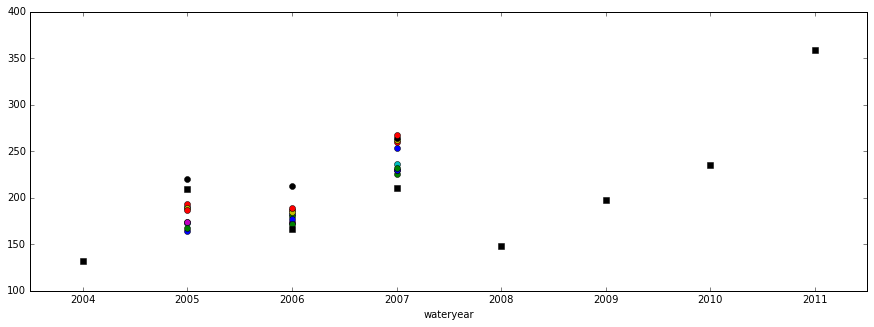

In [152]:
sims.plot(kind='line',figsize=(15,5),legend=False,marker='o',ls='')
obs.discharge.plot(c='k',marker='s',ls='')
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.set_xlim(2003.5,2011.5)

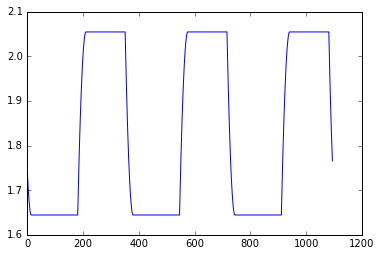

In [90]:
plt.plot(dat['lai'])

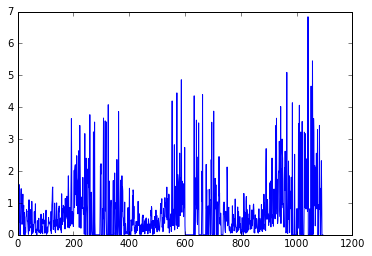

In [91]:
plt.plot(dat['evap']+dat['trans'])

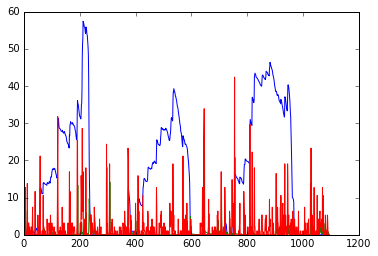

In [92]:
plt.plot(dat['snowpack'])
plt.plot(dat['streamflow'])
plt.plot(dat['precip'])

In [51]:
params.iloc[0:-1,]

idx,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
crd,7.740,6.149,8.188,4.167,5.304,9.478,8.701,3.559,7.726,4.462,...,4.087,2.970,6.032,8.022,4.459,2.574,2.977,8.763,2.678,4.804
gw1,0.935,0.516,0.721,0.033,0.934,0.931,0.735,0.921,0.133,0.889,...,0.277,0.834,0.146,0.610,0.490,0.727,0.002,0.416,0.684,0.377
gw2,0.148,0.618,0.452,0.819,0.730,0.889,0.033,0.281,0.140,0.041,...,0.123,0.420,0.182,0.379,0.338,0.628,0.184,0.168,0.948,0.690
ksat,1.617,2.645,8.037,9.139,1.134,4.535,3.309,7.747,1.520,4.563,...,9.024,8.917,2.010,2.259,3.232,1.675,3.652,3.652,8.039,6.696
m,26.286,13.297,0.423,22.006,24.428,23.032,9.429,24.341,20.784,26.964,...,0.498,23.210,20.954,25.870,1.963,19.149,8.186,21.520,23.075,28.175
pa,0.305,0.884,1.595,1.563,1.092,0.985,1.080,1.092,1.234,0.685,...,0.404,0.992,1.186,1.359,0.438,0.469,0.264,1.543,0.442,0.827
po,0.473,1.426,1.133,1.325,1.036,1.680,1.498,1.070,1.542,1.101,...,1.035,1.467,0.259,1.440,0.126,0.644,0.915,0.641,0.914,0.127
trd,1.343,0.118,1.061,1.900,1.748,0.282,0.487,1.426,0.739,0.071,...,1.932,0.994,1.277,0.291,1.110,0.921,0.901,0.534,1.653,1.195


In [48]:
data2 = pd.merge(left=data2,right=files,how='inner',on='idx')

In [51]:
n, = np.load(data2.filename[0])['streamflow'].shape
m = len(data2)

In [52]:
sims = np.zeros((m,n))

In [54]:
ct = 0
for fl in data2.filename:
    sims[ct,:] = np.load(fl)['streamflow']
    ct += 1

In [55]:
np.savetxt('./data/glue_simulations.csv',sims,delimiter=',')

In [36]:
sims.shape

(1490, 2922)

In [25]:
files

,filename,idx
idx,,
0,/RHESSys/Como/out/cal05/cal05_0.npz,0
1,/RHESSys/Como/out/cal05/cal05_1.npz,1
2,/RHESSys/Como/out/cal05/cal05_2.npz,2
3,/RHESSys/Como/out/cal05/cal05_3.npz,3
4,/RHESSys/Como/out/cal05/cal05_4.npz,4
5,/RHESSys/Como/out/cal05/cal05_5.npz,5
6,/RHESSys/Como/out/cal05/cal05_6.npz,6
7,/RHESSys/Como/out/cal05/cal05_7.npz,7
8,/RHESSys/Como/out/cal05/cal05_8.npz,8


In [68]:
fl = '/RHESSys/Como/out/cal/cal12_498.npz'

In [69]:
dat = np.load(fl)

In [70]:
dat = pd.DataFrame({'streamflow':dat['streamflow']})

In [71]:
dat.index = pd.DatetimeIndex(pd.date_range(start=strt,end=nd,freq='D'))

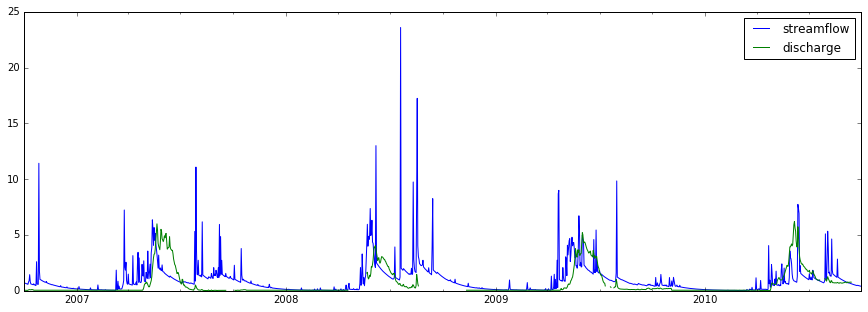

In [72]:
dat.streamflow.plot(figsize=(15,5))
obs.discharge.plot()
plt.legend()